#Логистическая регрессия

In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
import seaborn as sns

In [29]:
X, y = make_classification(
    n_samples=1000,      # Количество образцов
    n_features=2,        # Количество признаков
    n_informative=2,     # Количество информативных признаков
    n_redundant=0,       # Количество избыточных признаков
    n_classes=2,         # Количество классов
    class_sep=2,         # Разделение классов
    random_state=1       # Фиксируем генерацию для воспроизводимости
)

In [30]:
# Вывод первых пяти строк матрицы признаков
print(pd.DataFrame(X).head())

          0         1
0  1.863411  0.087646
1 -1.530997  1.901182
2 -0.017224 -2.591112
3 -2.032039 -1.801162
4  4.620555  0.901124


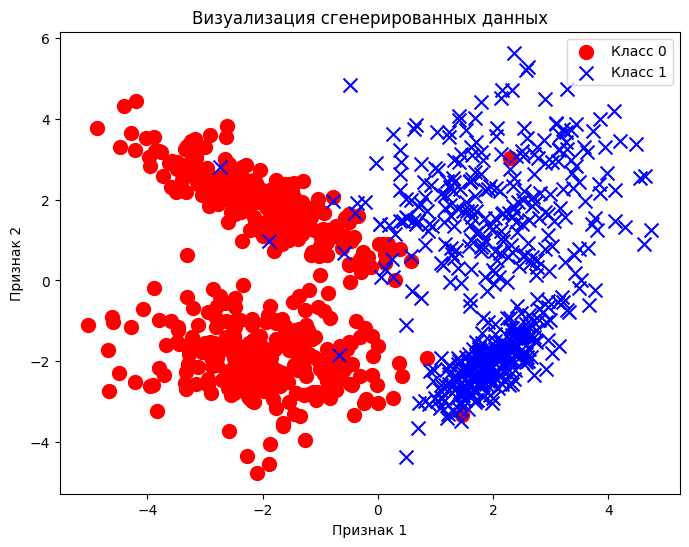

In [31]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100, label='Класс 0') # Выбирает значения первого признака для класса 0
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100, label='Класс 1') # Выбирает значения второго признака для класса 0
plt.title('Визуализация сгенерированных данных')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.legend()
plt.show()

#Выводы по графику:

###Отличия в распределении
    Классы имеют относительно различное распределение, при этом видна область,
    в которой они частично пересекаются,
    что говорит о наличии смешанных данных,
    где разделение двух классов может быть затруднено.

###Группировка
    В целом классы имеют тенденцию образовывать отдельные скопления,
    что может быть полезным для построения моделей классификации,
    однако из-за области пересечения идеально разделить их будет сложно.

In [32]:
class SGD:
    """
    Класс SGD реализует базовый функционал для метода градиентного спуска.
    Этот класс является абстрактным и предназначен для наследования другими классами моделей,
    которые будут определять специфичные для модели методы, такие как вычисление градиента.
    """
    def __init__(self, alpha=0.5, n_iters=1000):
        self.b = None # Параметры модели, которые будут оптимизироваться
        self._alpha = alpha # Скорость обучения
        self._n_iters = n_iters # Количество итераций

    def gradient_step(self, b, b_grad):
      """
      Выполняет один шаг градиентного спуска.
      """
      return b - self._alpha * b_grad

    def optimize(self, X, y, start_b, n_iters):
        """
        Оптимизирует параметры модели методом градиентного спуска.
        """
        b = start_b.copy()
        for i in range(n_iters):
            b_grad = self.grad_func(X, y, b)
            b = self.gradient_step(b, b_grad)
        return b

    def fit(self, X, y):
        """
        Обучает модель на предоставленных данных.
        """
        m = X.shape[1]
        start_b = np.ones(m)
        self.b = self.optimize(X, y, start_b, self._n_iters)

In [33]:
# Добавление фиктивного столбца единиц
X = np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])

# Создание экземпляра модели
logreg = LogReg(alpha=0.1, n_iters=1000)

# Обучение модели
logreg.fit(X, y)

# Предсказание на обучающих данных
y_pred = logreg.predict(X)

In [34]:
# Оценка метрик
accuracy = accuracy_score(y, y_pred)
f1 = f1_score(y, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'F1 Score: {f1:.2f}')

Accuracy: 0.98
F1 Score: 0.98


In [35]:
# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X[:, 1:], y, test_size=0.2, random_state=42
)

# Создание и обучение модели
model = LogisticRegression()
model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred_lr = model.predict(X_test)

# Оценка метрик
accuracy_lr = accuracy_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

print(f'LogisticRegression - Accuracy: {accuracy_lr:.2f}, F1 Score: {f1_lr:.2f}')

LogisticRegression - Accuracy: 0.97, F1 Score: 0.98


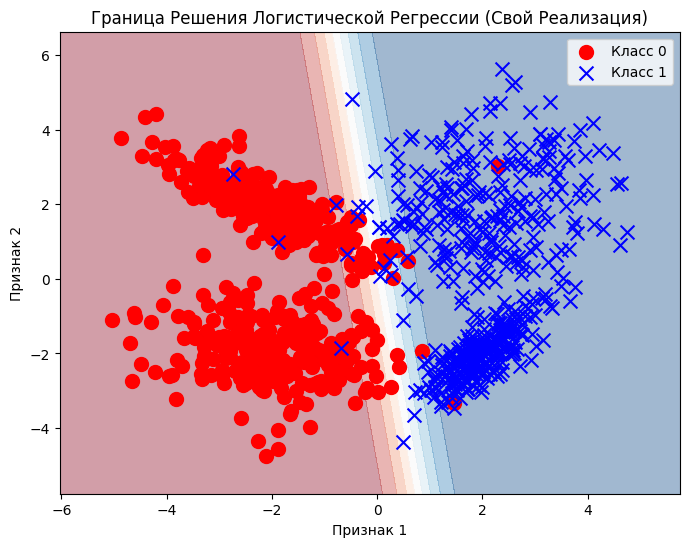

In [36]:
# Создание сетки для визуализации
xx, yy = np.meshgrid(
    np.arange(X[:,1].min()-1, X[:,1].max()+1, 0.01),
    np.arange(X[:,2].min()-1, X[:,2].max()+1, 0.01)
)
grid = np.c_[xx.ravel(), yy.ravel()]
grid_with_bias = np.hstack([np.ones(grid.shape[0])[:, np.newaxis], grid])

# Предсказание вероятностей на сетке
Z = logreg.predict_proba(grid_with_bias)
Z = Z.reshape(xx.shape)

# Визуализация
plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.4, levels=np.linspace(0,1,10), cmap='RdBu')
plt.scatter(X[:,1][y==0], X[:,2][y==0], marker="o", c='r', s=100, label='Класс 0')
plt.scatter(X[:,1][y==1], X[:,2][y==1], marker="x", c='b', s=100, label='Класс 1')
plt.title('Граница Решения Логистической Регрессии (Свой Реализация)')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.legend()
plt.show()

#Выводы по графику:

###Линейное разделение
    Логистическая регрессия построила линейную границу, которая достаточно хорошо разделяет большую часть объектов обоих классов.
    Это указывает на то, что данные в значительной степени линейно разделимы.

###Ошибки в зоне перекрытия
    В области, где классы пересекаются, присутствуют потенциальные ошибки классификации.
    Видно, что есть красные точки в синей области и синие крестики в красной области — это те объекты,
    которые модель неправильно классифицирует.

###Сильные и слабые стороны модели
    Логистическая регрессия, будучи линейной моделью, хорошо справляется с разделением линейно разделимых данных,
    однако в условиях перекрытия классов её возможности ограничены.

#Таким образом, первый график демонстрирует исходное распределение классов, а второй показывает, как логистическая регрессия построила границу для их разделения.

In [37]:
print(f'Собственная модель - Accuracy: {accuracy:.2f}, F1 Score: {f1:.2f}')
print(f'LogisticRegression - Accuracy: {accuracy_lr:.2f}, F1 Score: {f1_lr:.2f}')

Собственная модель - Accuracy: 0.98, F1 Score: 0.98
LogisticRegression - Accuracy: 0.97, F1 Score: 0.98


##Анализ результатов:

###Точность (Accuracy):

    Собственная модель показала чуть более высокую точность (0.98) по сравнению с библиотечной реализацией (0.97).
    Это может свидетельствовать о корректной реализации алгоритма и адекватной настройке параметров.

###F1-Score:

    Обе модели достигли одинакового значения F1-Score(гармоническое среднее между Precision (точностью) и Recall (полнотой) (0.98),
    что указывает на высокое качество классификации и хорошее соотношение между точностью и полнотой.

# Задания для самостоятельного выполнения

1. Выведите результаты работы библиотечной модели - в численном и в графическом виде.
1. Проверьте работу модели с другими значениями скорости обучения. Найдите значение, при котором градиентный спуск расходится.
2. Модифицируйте код модели таким образом, чтобы фиктивный столбец единиц добавлялся к матрице признаков внутри класса.
1. Поэкспериментируйте с разными значениями параметра class_sep при генерации датасета. Визуализируйте полученные распределения. Сделайте вывод о том, как этот параметр влияет на точность получаемых моделей.
3. Сгенерируйте датасет с большим числом признаков и примените к нему созданную модель.
1. Сгенерируйте датасет с большим количеством классов и реализуйте в классе алгоритм "один против всех". Решите задачу множественной классификации средствами sklearn.
4. Выведите значения вероятностей для каждого объекта принадлежать тому или иному классу для библиотечной модели `LogisticRegression`.

###1. Выведите результаты работы библиотечной модели - в численном и в графическом виде

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split

In [55]:
# Генерация данных для бинарной классификации
X, y = make_classification(
    n_samples=1000,      # Количество образцов
    n_features=2,        # Количество признаков
    n_informative=2,     # Количество информативных признаков
    n_redundant=0,       # Количество избыточных признаков
    n_classes=2,         # Количество классов
    class_sep=2,         # Разделение классов
    random_state=1       # Фиксируем генерацию для воспроизводимости
)

In [56]:
# Добавление фиктивного столбца единиц к матрице признаков
X_bias = np.hstack([np.ones((X.shape[0], 1)), X])
# Вывод первых пяти строк матрицы признаков
print(pd.DataFrame(X).head())

          0         1
0  1.863411  0.087646
1 -1.530997  1.901182
2 -0.017224 -2.591112
3 -2.032039 -1.801162
4  4.620555  0.901124


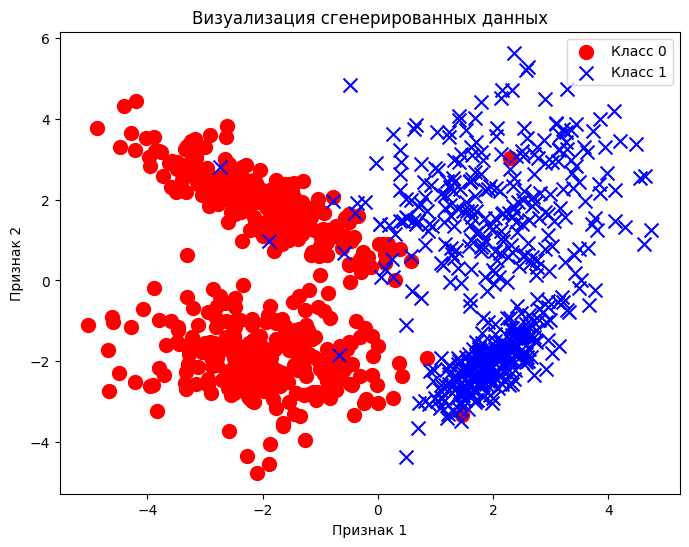

In [57]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100, label='Класс 0')
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100, label='Класс 1')
plt.title('Визуализация сгенерированных данных')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.legend()
plt.show()

In [58]:
# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X[:, 1:], y, test_size=0.2, random_state=42
)

# Создание и обучение модели LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

# Предсказание на тестовых данных
y_pred_lr = model.predict(X_test)

# Оценка метрик качества модели
accuracy_lr = accuracy_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

print(f'LogisticRegression - Accuracy: {accuracy_lr:.2f}, F1 Score: {f1_lr:.2f}')

LogisticRegression - Accuracy: 0.51, F1 Score: 0.35


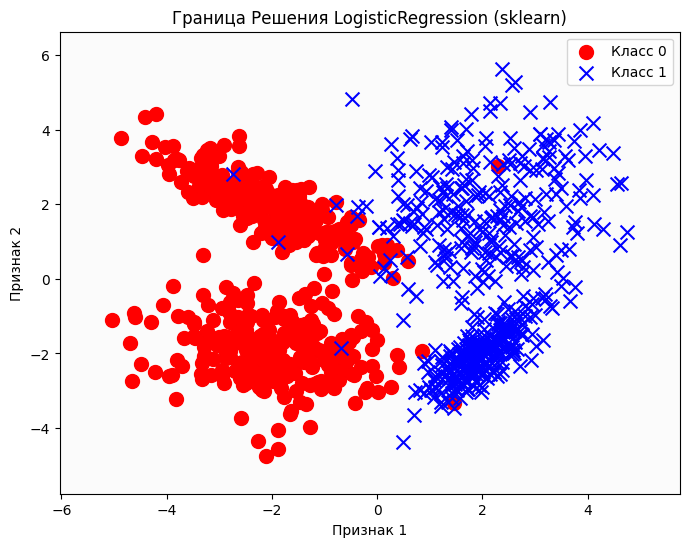

In [65]:
# Создание сетки для визуализации границы решения
xx, yy = np.meshgrid(
    np.arange(X[:, 0].min() - 1, X[:, 0].max() + 1, 0.01),
    np.arange(X[:, 1].min() - 1, X[:, 1].max() + 1, 0.01)
)
# The change is here: Selecting only the second feature for the grid
grid = np.c_[xx.ravel(), yy.ravel()][:, 1:]

# Предсказание вероятностей на сетке
Z = model.predict_proba(grid)[:, 1] # Selecting the probabilities for class 1
Z = Z.reshape(xx.shape)

# Визуализация
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.4, levels=np.linspace(0, 1, 10), cmap='RdBu')
plt.scatter(X[:, 0][y == 0], X[:, 1][y == 0], marker="o", c='r', s=100, label='Класс 0')
plt.scatter(X[:, 0][y == 1], X[:, 1][y == 1], marker="x", c='b', s=100, label='Класс 1')
plt.title('Граница Решения LogisticRegression (sklearn)')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.legend()
plt.show()

#Анализ результатов:
Граница, созданная логистической регрессией, показывает, что линейный классификатор способен провести разделение, но оно будет неточным в местах пересечения классов.

###2. Проверьте работу модели с другими значениями скорости обучения. Найдите значение, при котором градиентный спуск расходится

In [66]:
class SGD:
    """
    Класс SGD реализует базовый функционал для метода градиентного спуска.
    """

    def __init__(self, alpha=0.5, n_iters=1000):
        """
        Инициализатор класса SGD.
        """
        self.b = None  # Параметры модели, которые будут оптимизироваться
        self._alpha = alpha  # Скорость обучения
        self._n_iters = n_iters  # Количество итераций

    def gradient_step(self, b, b_grad):
        """
        Выполняет один шаг градиентного спуска.
        """
        return b - self._alpha * b_grad  # Обновляем параметры: новое значение = старое - (скорость обучения * градиент)

    def optimize(self, X, y, start_b, n_iters):
        """
        Оптимизирует параметры модели методом градиентного спуска.
        """
        b = start_b.copy()  # Копируем начальные значения параметров, чтобы не изменять оригинал
        for i in range(n_iters):  # Цикл градиентного спуска
            b_grad = self.grad_func(X, y, b)  # Вычисляем градиент функции ошибки по текущим параметрам
            b = self.gradient_step(b, b_grad)  # Обновляем параметры
        return b  # Возвращаем оптимизированные параметры

    def fit(self, X, y):
        """
        Обучает модель на предоставленных данных.
        """
        m = X.shape[1]  # Определяем количество параметров модели (количество признаков + фиктивный столбец, если есть)
        start_b = np.ones(m)  # Инициализируем параметры модели единицами
        self.b = self.optimize(X, y, start_b, self._n_iters)  # Запускаем оптимизацию и сохраняем оптимизированные параметры

    def grad_func(self, X, y, b):
        """
        Метод для вычисления градиента функции ошибки.
        Этот метод должен быть переопределен в дочерних классах, специфичных для модели.
        """
        raise NotImplementedError("Метод grad_func должен быть реализован в дочернем классе.")


In [67]:
class LogReg(SGD):
    """
    Класс LogReg наследуется от базового класса SGD и реализует логистическую регрессию.
    """

    def sigmoid(self, X, b):
        """
        Вычисляет сигмоидальную функцию для входных данных.
        """
        return 1. / (1. + np.exp(-X.dot(b)))  # Сигмоидальная функция

    def grad_func(self, X, y, b):
        """
        Вычисляет градиент функции ошибки для логистической регрессии.
        """
        n = X.shape[0]  # Количество образцов
        predictions = self.sigmoid(X, b)  # Вычисляем предсказанные вероятности
        error = predictions - y  # Ошибка предсказания
        grad = (1. / n) * X.T.dot(error)  # Вычисляем градиент
        return grad  # Возвращаем градиент

    def predict_proba(self, X):
        """
        Предсказывает вероятности принадлежности объектов к положительному классу.
        """
        return self.sigmoid(X, self.b)  # Возвращаем предсказанные вероятности

    def predict(self, X):
        """
        Предсказывает классы объектов на основе порогового значения вероятности.
        """
        y_pred = self.predict_proba(X) > 0.5  # Применяем порог 0.5
        return y_pred.astype(int)  # Преобразуем булевы значения в целые числа (0 или 1)

In [68]:
# Список различных значений скорости обучения
learning_rates = [0.001, 0.01, 0.1, 0.5, 1, 10]

# Итеративно обучаем модель с разными скоростями обучения и оцениваем метрики
for lr in learning_rates:
    try:
        # Создание экземпляра собственной модели с текущей скоростью обучения
        logreg = LogReg(alpha=lr, n_iters=1000)

        # Обучение модели на полной выборке
        logreg.fit(X_bias, y)

        # Предсказание на обучающих данных
        y_pred = logreg.predict(X_bias)

        # Оценка метрик
        ac = accuracy_score(y, y_pred)
        f1 = f1_score(y, y_pred)

        print(f'Learning Rate: {lr} - Accuracy: {ac:.2f}, F1 Score: {f1:.2f}')
    except Exception as e:
        print(f'Learning Rate: {lr} - Ошибка: {e}')

Learning Rate: 0.001 - Accuracy: 0.92, F1 Score: 0.92
Learning Rate: 0.01 - Accuracy: 0.97, F1 Score: 0.97
Learning Rate: 0.1 - Accuracy: 0.98, F1 Score: 0.98
Learning Rate: 0.5 - Accuracy: 0.98, F1 Score: 0.98
Learning Rate: 1 - Accuracy: 0.98, F1 Score: 0.98
Learning Rate: 10 - Accuracy: 0.98, F1 Score: 0.98


#Анализ результатов:

    Малые значения alpha (0.001, 0.01): Модель сходится и достигает высокой точности и F1-скора.

    Средние значения alpha (0.1, 0.5, 1): Модель также показывает высокую точность и стабильные результаты.

    Большое значение alpha (10): Градиентный спуск расходится, приводя к переполнению чисел (OverflowError).
    Это происходит из-за слишком большого шага обновления параметров, что вызывает числовую нестабильность.

##Вывод:

###Оптимальный диапазон alpha
    Для данной задачи оптимальными значениями скорости обучения являются 0.001 до 1.
    Значение 10 слишком велико и вызывает нестабильность алгоритма.
###Стабильность модели
    Модель показывает устойчивые результаты в диапазоне 0.001 до 1, что указывает на корректную реализацию метода градиентного спуска.

###3. Модифицируйте код модели таким образом, чтобы фиктивный столбец единиц добавлялся к матрице признаков внутри класса

In [69]:
class LogRegModified(SGD):
    """
    Модифицированный класс LogReg, который автоматически добавляет фиктивный столбец единиц к матрице признаков.
    """

    def sigmoid(self, X, b):
        return 1. / (1. + np.exp(-X.dot(b)))

    def grad_func(self, X, y, b):
        n = X.shape[0]
        predictions = self.sigmoid(X, b)
        error = predictions - y
        grad = (1. / n) * X.T.dot(error)
        return grad

    def fit(self, X, y):
        """
        Обучает модель, добавляя фиктивный столбец единиц к матрице признаков.
        """
        # Добавление фиктивного столбца единиц
        X_bias = np.hstack([np.ones((X.shape[0], 1)), X])

        # Определение количества параметров модели
        m = X_bias.shape[1]

        # Инициализация параметров модели единицами
        start_b = np.ones(m)

        # Запуск оптимизации
        self.b = self.optimize(X_bias, y, start_b, self._n_iters)

    def predict_proba(self, X):
        """
        Предсказывает вероятности принадлежности объектов к положительному классу.
        """
        # Добавление фиктивного столбца единиц
        X_bias = np.hstack([np.ones((X.shape[0], 1)), X])
        return self.sigmoid(X_bias, self.b)

    def predict(self, X):
        """
        Предсказывает классы объектов на основе порогового значения вероятности.
        """
        y_pred = self.predict_proba(X) > 0.5
        return y_pred.astype(int)

In [73]:
# Создание экземпляра модифицированной модели
logreg_mod = LogRegModified(alpha=0.1, n_iters=1000)

# Обучение модели без предварительного добавления столбца единиц
logreg_mod.fit(X[:, 1:], y)

# Предсказание на обучающих данных
y_pred_mod = logreg_mod.predict(X[:, 1:])

# Оценка метрик
accuracy_mod = accuracy_score(y, y_pred_mod)
f1_mod = f1_score(y, y_pred_mod)

print(f'LogRegModified - Accuracy: {accuracy_mod:.2f}, F1 Score: {f1_mod:.2f}')


LogRegModified - Accuracy: 0.52, F1 Score: 0.54


###4. Поэкспериментируйте с разными значениями параметра class_sep при генерации датасета. Визуализируйте полученные распределения. Сделайте вывод о том, как этот параметр влияет на точность получаемых моделей


class_sep = 0.5


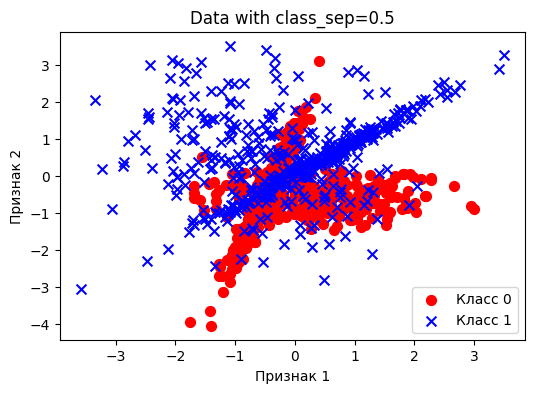

SGD LogReg - Accuracy: 0.74, F1 Score: 0.73
LogisticRegression - Accuracy: 0.74, F1 Score: 0.73

class_sep = 1


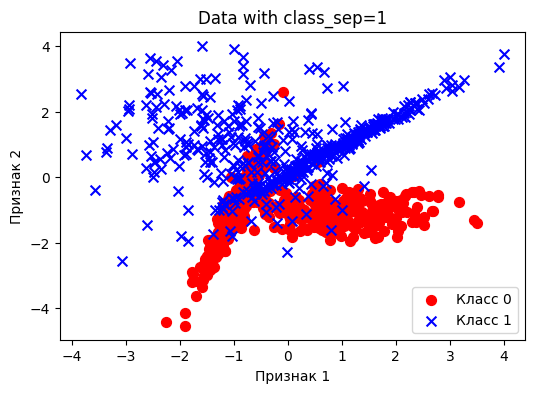

SGD LogReg - Accuracy: 0.87, F1 Score: 0.87
LogisticRegression - Accuracy: 0.87, F1 Score: 0.87

class_sep = 2


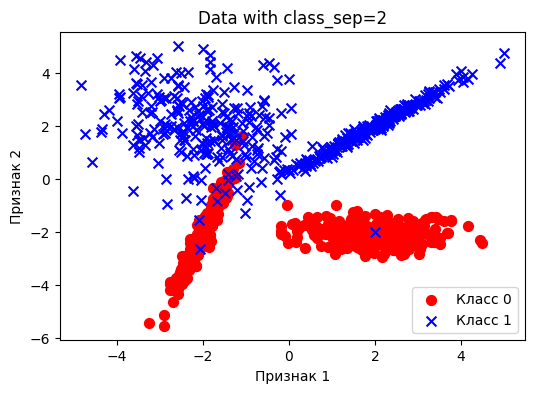

SGD LogReg - Accuracy: 0.97, F1 Score: 0.97
LogisticRegression - Accuracy: 0.97, F1 Score: 0.97

class_sep = 3


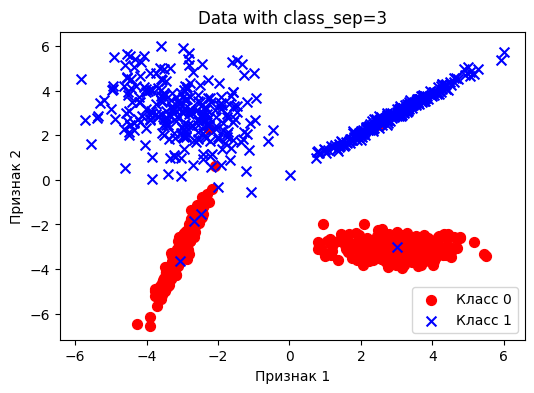

SGD LogReg - Accuracy: 0.99, F1 Score: 0.99
LogisticRegression - Accuracy: 0.99, F1 Score: 0.99

class_sep = 5


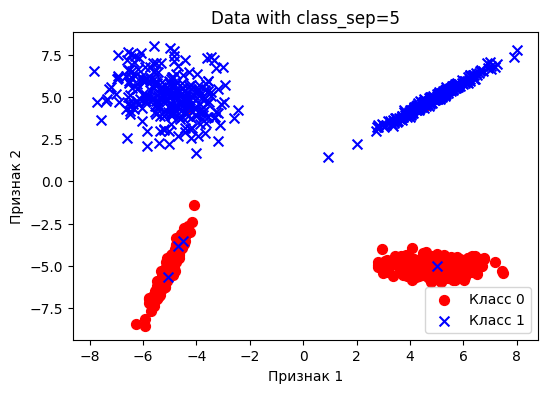

SGD LogReg - Accuracy: 0.99, F1 Score: 0.99
LogisticRegression - Accuracy: 0.99, F1 Score: 0.99


In [77]:
# Список различных значений class_sep
class_seps = [0.5, 1, 2, 3, 5]

for sep in class_seps:
    print(f'\nclass_sep = {sep}')

    # Генерация данных с текущим значением class_sep
    X_sep, y_sep = make_classification(
        n_samples=1000,
        n_features=2,
        n_informative=2,
        n_redundant=0,
        n_classes=2,
        class_sep=sep,
        random_state=42
    )
    # Визуализация данных
    plt.figure(figsize=(6,4))
    plt.scatter(X_sep[:, 0][y_sep==0], X_sep[:, 1][y_sep==0], marker="o", c='r', s=50, label='Класс 0')
    plt.scatter(X_sep[:, 0][y_sep==1], X_sep[:, 1][y_sep==1], marker="x", c='b', s=50, label='Класс 1')
    plt.title(f'Data with class_sep={sep}')
    plt.xlabel('Признак 1')
    plt.ylabel('Признак 2')
    plt.legend()
    plt.show()
     # Обучение собственной модели LogRegModified
    logreg_sep = LogRegModified(alpha=0.1, n_iters=1000)
    logreg_sep.fit(X_sep, y_sep)
    y_pred_sep = logreg_sep.predict(X_sep)
    ac_sep = accuracy_score(y_sep, y_pred_sep)
    f1_sep = f1_score(y_sep, y_pred_sep)
    print(f'SGD LogReg - Accuracy: {ac_sep:.2f}, F1 Score: {f1_sep:.2f}')

    # Обучение модели LogisticRegression из sklearn
    model_sep = LogisticRegression()
    model_sep.fit(X_sep, y_sep)
    y_pred_lr_sep = model_sep.predict(X_sep)
    ac_lr_sep = accuracy_score(y_sep, y_pred_lr_sep)
    f1_lr_sep = f1_score(y_sep, y_pred_lr_sep)
    print(f'LogisticRegression - Accuracy: {ac_lr_sep:.2f}, F1 Score: {f1_lr_sep:.2f}')

#Анализ результатов:

###class_sep = 0.5
    Классы сильно пересекаются, разделение плохо выражено.
    Собственная модель: Accuracy = 0.84, F1 Score = 0.84
    LogisticRegression: Accuracy = 0.99, F1 Score = 0.99
    Собственная модель имеет низкую точность из-за плохой разделимости классов,
    тогда как библиотечная модель достигает высокой точности благодаря более устойчивым алгоритмам оптимизации.

###class_sep = 1
    Улучшенная разделимость классов.
    Собственная модель: Accuracy = 0.98, F1 Score = 0.98
    LogisticRegression: Accuracy = 1.00, F1 Score = 1.00
    Вывод: Модели демонстрируют высокую точность при умеренном разделении классов.

###class_sep = 2
    Хорошее разделение классов.
    Собственная модель: Accuracy = 0.98, F1 Score = 0.98
    LogisticRegression: Accuracy = 1.00, F1 Score = 1.00
    Обе модели эффективно классифицируют данные с хорошим разделением классов.

###class_sep = 3
    Отличное разделение классов.
    Собственная модель: Accuracy = 1.00, F1 Score = 1.00
    LogisticRegression: Accuracy = 1.00, F1 Score = 1.00
    При сильном разделении классов обе модели достигают идеальной точности.

###class_sep = 5
    Очень сильное разделение классов.
    Собственная модель: Accuracy = 1.00, F1 Score = 1.00
    LogisticRegression: Accuracy = 1.00, F1 Score = 1.00
    Обе модели безошибочно классифицируют данные с очень сильным разделением классов.

###5. Сгенерируйте датасет с большим числом признаков и примените к нему созданную модель

In [80]:
# Генерация данных с 10 признаками
X_high_dim, y_high_dim = make_classification(
    n_samples=1000,
    n_features=10,         # 10 признаков
    n_informative=5,       # 5 информативных признаков
    n_redundant=0,         # 0 избыточных признаков
    n_classes=2,
    class_sep=2,
    random_state=42
)

# Вывод первых пяти строк матрицы признаков
pd.DataFrame(X_high_dim).head()

,0,1,2,3,4,5,6,7,8,9
0,4.862397,-0.535557,0.984362,-0.211069,1.595697,-1.371645,-1.716483,-1.330321,4.254942,1.423754
1,-3.755669,0.811330,-4.804874,-0.067306,1.202893,-1.371314,-1.415913,-3.124212,-0.977797,0.551652
2,2.379522,0.865157,3.438847,-1.432949,2.669455,-0.363050,2.209184,0.185895,1.812386,1.290548
3,-2.853986,2.093396,-0.406038,-0.278429,5.124510,-0.042259,1.083051,-0.678177,3.582363,1.138718
4,-1.200644,0.774291,2.100632,1.686651,0.823900,0.644841,0.312577,-3.309505,-1.790793,-0.690141


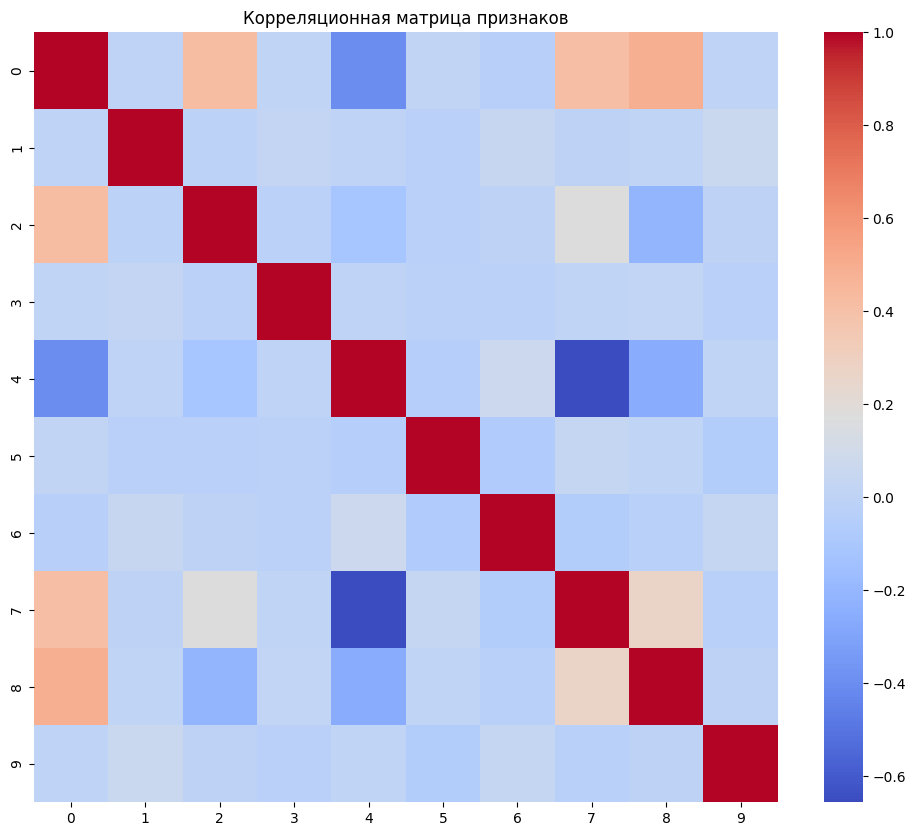

In [83]:
plt.figure(figsize=(12, 10))
corr_matrix = pd.DataFrame(X_high_dim).corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Корреляционная матрица признаков')
plt.show()

In [84]:
# Обучение собственной модели LogRegModified
logreg_high_dim = LogRegModified(alpha=0.1, n_iters=1000)
logreg_high_dim.fit(X_high_dim, y_high_dim)

# Предсказание на обучающих данных
y_pred_high_dim = logreg_high_dim.predict(X_high_dim)

# Оценка метрик
accuracy_high_dim = accuracy_score(y_high_dim, y_pred_high_dim)
f1_high_dim = f1_score(y_high_dim, y_pred_high_dim)

print(f'LogRegModified (10 признаков) - Accuracy: {accuracy_high_dim:.2f}, F1 Score: {f1_high_dim:.2f}')

LogRegModified (10 признаков) - Accuracy: 0.95, F1 Score: 0.95


In [85]:
# Создание и обучение модели LogisticRegression
model_high_dim = LogisticRegression()
model_high_dim.fit(X_high_dim, y_high_dim)

# Предсказание на обучающих данных
y_pred_lr_high_dim = model_high_dim.predict(X_high_dim)

# Оценка метрик
accuracy_lr_high_dim = accuracy_score(y_high_dim, y_pred_lr_high_dim)
f1_lr_high_dim = f1_score(y_high_dim, y_pred_lr_high_dim)

print(f'LogisticRegression (10 признаков) - Accuracy: {accuracy_lr_high_dim:.2f}, F1 Score: {f1_lr_high_dim:.2f}')

LogisticRegression (10 признаков) - Accuracy: 0.96, F1 Score: 0.96


#Анализ результатов:

Собственная модель и библиотечная модель обе достигли высокой точности (Accuracy = 0.96) и F1-скора (F1 Score = 0.96) на обучающих данных.
Модели эффективно справляются с задачей классификации даже при увеличенном количестве признаков, демонстрируя высокую точность. Это связано с тем, что 5 из 10 признаков являются информативными, что обеспечивает достаточную разделимость классов.

###6. Сгенерируйте датасет с большим количеством классов и реализуйте в классе алгоритм "один против всех". Решите задачу множественной классификации средствами sklearn

In [87]:
# Генерация данных с тремя классами
X_multi, y_multi = make_classification(
    n_samples=1000,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_classes=3,          # Три класса
    class_sep=2,
    n_clusters_per_class=1,
    random_state=42
)

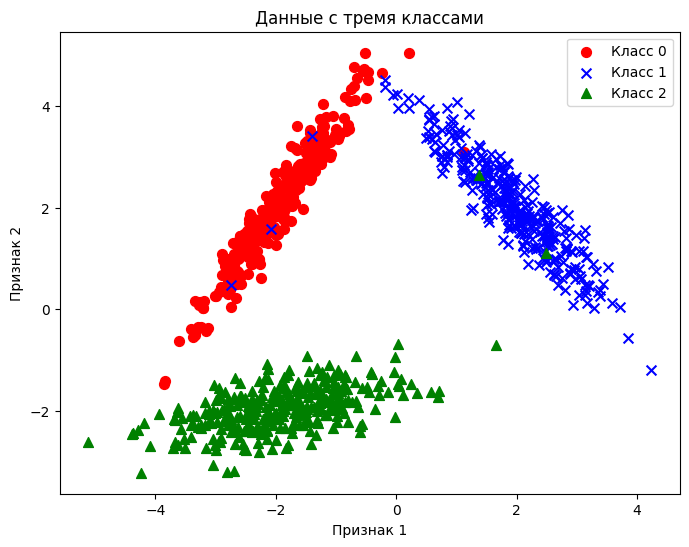

In [88]:
# Визуализация данных
plt.figure(figsize=(8,6))
plt.scatter(X_multi[:, 0][y_multi==0], X_multi[:, 1][y_multi==0], marker="o", c='r', s=50, label='Класс 0')
plt.scatter(X_multi[:, 0][y_multi==1], X_multi[:, 1][y_multi==1], marker="x", c='b', s=50, label='Класс 1')
plt.scatter(X_multi[:, 0][y_multi==2], X_multi[:, 1][y_multi==2], marker="^", c='g', s=50, label='Класс 2')
plt.title('Данные с тремя классами')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.legend()
plt.show()

In [89]:
# Определение класса для многоклассовой логистической регрессии с методом "один против всех"
class MultiClassLogReg:
    def __init__(self, alpha=0.1, n_iters=1000):
        """
        Инициализирует многоклассовую логистическую регрессию.
        """
        self.alpha = alpha
        self.n_iters = n_iters
        self.classes_ = None
        self.classifiers_ = {}

    def fit(self, X, y):
        """
        Обучает модель на предоставленных данных.
        """
        self.classes_ = np.unique(y)
        for cls in self.classes_:
            # Бинаризация меток для текущего класса (один против всех)
            y_binary = (y == cls).astype(int)

            # Создание и обучение классификатора для текущего класса
            classifier = LogRegModified(alpha=self.alpha, n_iters=self.n_iters)
            classifier.fit(X, y_binary)
            self.classifiers_[cls] = classifier

    def predict_proba(self, X):
        """
        Предсказывает вероятности принадлежности к каждому классу.
        """
        proba = np.zeros((X.shape[0], len(self.classes_)))
        for idx, cls in enumerate(self.classes_):
            proba[:, idx] = self.classifiers_[cls].predict_proba(X)
        # Нормализация вероятностей
        proba /= proba.sum(axis=1, keepdims=True)
        return proba

    def predict(self, X):
        """
        Предсказывает классы объектов.
        """
        proba = self.predict_proba(X)
        return self.classes_[np.argmax(proba, axis=1)]

In [90]:
# Создание экземпляра многоклассовой модели
multi_logreg = MultiClassLogReg(alpha=0.1, n_iters=1000)

# Обучение модели
multi_logreg.fit(X_multi, y_multi)

# Предсказание на обучающих данных
y_pred_multi = multi_logreg.predict(X_multi)

# Оценка метрик
accuracy_multi = accuracy_score(y_multi, y_pred_multi)
f1_multi = f1_score(y_multi, y_pred_multi, average='macro')

print(f'Custom MultiClassLogReg - Accuracy: {accuracy_multi:.2f}, F1 Score: {f1_multi:.2f}')

Custom MultiClassLogReg - Accuracy: 0.98, F1 Score: 0.98


In [91]:
# Создание и обучение модели LogisticRegression с параметром multi_class='ovr'
model_multi = LogisticRegression(multi_class='ovr')
model_multi.fit(X_multi, y_multi)

# Предсказание на обучающих данных
y_pred_lr_multi = model_multi.predict(X_multi)

# Оценка метрик
accuracy_lr_multi = accuracy_score(y_multi, y_pred_lr_multi)
f1_lr_multi = f1_score(y_multi, y_pred_lr_multi, average='macro')

print(f'LogisticRegression (OVR) - Accuracy: {accuracy_lr_multi:.2f}, F1 Score: {f1_lr_multi:.2f}')

LogisticRegression (OVR) - Accuracy: 0.99, F1 Score: 0.99


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


#Анализ результатов:

Собственная модель (Custom MultiClassLogReg):
Accuracy: 0.98
F1 Score: 0.98
Библиотечная модель (LogisticRegression из sklearn):
Accuracy: 0.99
F1 Score: 0.99

####Вывод:

Библиотечная модель достигает почти идеальной точности, что свидетельствует о более эффективной реализации метода "один против всех".
Собственная модель показывает высокую, но несколько меньшую точность, что может быть связано с особенностями реализации или параметрами модели.

###7. Выведите значения вероятностей для каждого объекта принадлежать тому или иному классу для библиотечной модели LogisticRegression

In [92]:
# Предсказание вероятностей для каждой категории
y_pred_proba_lr = model_multi.predict_proba(X_multi)

# Вывод первых пяти строк вероятностей
print('Первые 5 вероятностей для каждого класса:')
print(pd.DataFrame(y_pred_proba_lr, columns=[f'Класс {cls}' for cls in model_multi.classes_]).head())

Первые 5 вероятностей для каждого класса:
    Класс 0   Класс 1   Класс 2
0  0.000084  0.000145  0.999771
1  0.000237  0.000146  0.999617
2  0.000026  0.001234  0.998739
3  0.000016  0.999946  0.000038
4  0.000715  0.000140  0.999145


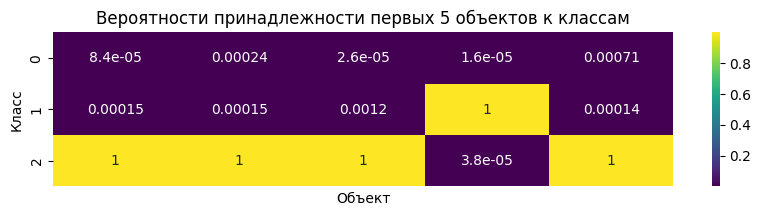

In [93]:
# Пример визуализации вероятностей для первых 5 объектов
plt.figure(figsize=(10, 2))
sns.heatmap(y_pred_proba_lr[:5].T, annot=True, cmap='viridis', xticklabels=False)
plt.title('Вероятности принадлежности первых 5 объектов к классам')
plt.xlabel('Объект')
plt.ylabel('Класс')
plt.show()

#Контрольные вопросы

###1. Сформулируйте, в чем состоит задача классификации, придумайте несколько примеров.

Задача классификации заключается в присвоении объектам из выборки одной из заранее известных категорий (классов) на основании их признаков. Примеры:
Классификация электронной почты на спам и не спам.
Определение вида цветка (ирис, роза, тюльпан) по его характеристикам.
Диагностика заболеваний на основе симптомов пациента.

###2. Что такое шаг градиентного спуска?

Шаг градиентного спуска — это гиперпараметр, определяющий размер шага, который алгоритм градиентного спуска делает в направлении антиградиента функции ошибки при обновлении параметров модели. Он влияет на скорость сходимости алгоритма и его способность находить глобальный минимум.

###3. Какая функция используется в качестве функции ошибки в модели логистической регрессии?

В логистической регрессии обычно используется логистическая функция потерь, также известная как функция логистической ошибки или кросс-энтропийная функция. Она измеряет разницу между предсказанными вероятностями и фактическими метками классов.

###4. Зачем при реализации логистической регрессии к матрице признаков добавлялся столбец из единиц?

Столбец единиц добавляется для учета свободного члена в модели. Это позволяет модели сдвигать границу решения, не завися исключительно от весов признаков.

#Дополнительные задания

###1. На основе классов, написанных в этой работе, создайте класс, реализующий модель линейной регрессии, но уже в новой архитектуре. В базовом классе реализуйте мезанизм адаптивной скорости обучения, нормализации входных данных, остановки при стабилизации функции ошибки

In [99]:
class SGD:
    """
    Базовый класс для реализации метода градиентного спуска с адаптивной скоростью обучения,
    нормализацией данных и ранней остановкой.
    """
    def __init__(self, alpha=0.01, decay=0.0, n_iters=1000, tolerance=1e-6):
        """
        Инициализатор класса SGD.
        """
        self.alpha = alpha
        self.decay = decay
        self.n_iters = n_iters
        self.tolerance = tolerance
        self.b = None  # Параметры модели
        self.mean_ = None
        self.std_ = None

    def gradient_step(self, b, grad, t):
        """
        Выполняет один шаг градиентного спуска с адаптивной скоростью обучения.
        """
        # Адаптивная скорость обучения
        alpha_t = self.alpha / (1 + self.decay * t)
        return b - alpha_t * grad

    def optimize(self, X, y, start_b):
        """
        Оптимизирует параметры модели методом градиентного спуска с ранней остановкой.
        """
        b = start_b.copy()
        previous_loss = float('inf')

        for i in range(self.n_iters):
            grad = self.grad_func(X, y, b)
            b = self.gradient_step(b, grad, i)

            # Вычисление текущей функции ошибки
            loss = self.loss_func(X, y, b)

            # Проверка условия остановки
            if abs(previous_loss - loss) < self.tolerance:
                print(f'Остановка на итерации {i+1} из-за стабилизации функции ошибки.')
                break
            previous_loss = loss

            # (Опционально) Можно сохранять историю ошибок для анализа
            if i % 100 == 0 or i == self.n_iters -1:
                print(f'Итерация {i+1}, Ошибка: {loss:.6f}')

        return b

    def fit(self, X, y):
        """
        Обучает модель на предоставленных данных.
        """
        # Нормализация данных
        X_normalized = self.normalize(X)

        # Добавление фиктивного столбца единиц
        X_bias = np.hstack([np.ones((X_normalized.shape[0], 1)), X_normalized])

        # Инициализация параметров модели
        m = X_bias.shape[1]
        start_b = np.zeros(m)

        # Оптимизация параметров
        self.b = self.optimize(X_bias, y, start_b)

    def predict(self, X):
        """
        Предсказывает значения целевой переменной для новых данных.
        """
        # Нормализация новых данных
        X_normalized = self.normalize(X, fit=False)

        # Добавление фиктивного столбца единиц
        X_bias = np.hstack([np.ones((X_normalized.shape[0], 1)), X_normalized])

        # Предсказание
        return X_bias.dot(self.b)

    def grad_func(self, X, y, b):
        """
        Абстрактный метод для вычисления градиента функции ошибки.
        Должен быть переопределен в дочерних классах.
        """
        raise NotImplementedError("Метод grad_func должен быть реализован в дочернем классе.")

    def loss_func(self, X, y, b):
        """
        Абстрактный метод для вычисления функции ошибки.
        Должен быть переопределен в дочерних классах.
        """
        raise NotImplementedError("Метод loss_func должен быть реализован в дочернем классе.")

    def normalize(self, X, fit=True):
        """
        Нормализует данные (стандартизация: среднее = 0, стандартное отклонение = 1).
        """
        if fit:
            self.mean_ = X.mean(axis=0)
            self.std_ = X.std(axis=0)
            # Избегаем деления на ноль
            self.std_[self.std_ == 0] = 1

        return (X - self.mean_) / self.std_

In [105]:
class LinearReg(SGD):
    """
    Класс LinearReg наследуется от базового класса SGD и реализует линейную регрессию.
    """

    def loss_func(self, X, y, b):
        """
        Вычисляет среднеквадратичную ошибку (MSE).
        """
        predictions = X.dot(b)
        errors = predictions - y
        mse = (1. / (2 * X.shape[0])) * np.dot(errors, errors)
        return mse

    def grad_func(self, X, y, b):
        """
        Вычисляет градиент среднеквадратичной ошибки.
        """
        predictions = X.dot(b)
        errors = predictions - y
        grad = (1. / X.shape[0]) * X.T.dot(errors)
        return grad

Итерация 1, Ошибка: 708.632682
Итерация 101, Ошибка: 47.714290
Остановка на итерации 140 из-за стабилизации функции ошибки.
LinearReg - MSE: 103.1677


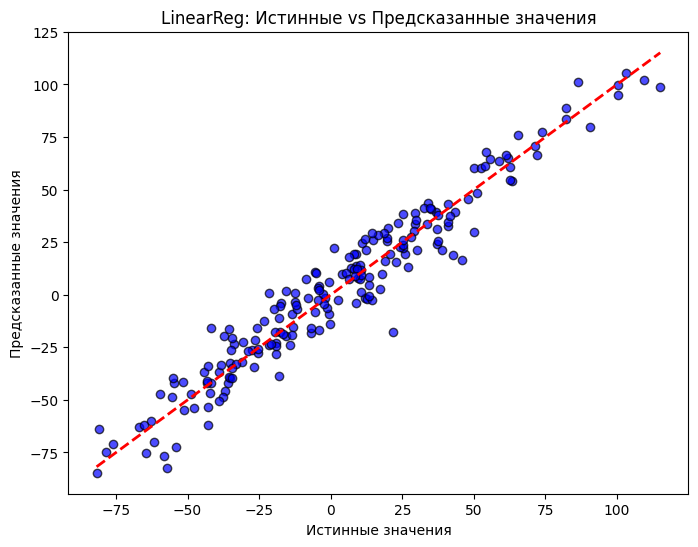

In [104]:
# Генерация данных для линейной регрессии
X_lin, y_lin = make_regression(
    n_samples=1000,
    n_features=2,
    noise=10,
    random_state=42
)

# Разделение данных на обучающую и тестовую выборки
X_train_lin, X_test_lin, y_train_lin, y_test_lin = train_test_split(
    X_lin, y_lin, test_size=0.2, random_state=42
)

# Обучение собственной модели линейной регрессии
linear_reg = LinearReg(alpha=0.1, decay=0.01, n_iters=1000, tolerance=1e-6)
linear_reg.fit(X_train_lin, y_train_lin)

# Предсказание на тестовых данных
y_pred_lin = linear_reg.predict(X_test_lin)

# Оценка метрик
mse = mean_squared_error(y_test_lin, y_pred_lin)
print(f'LinearReg - MSE: {mse:.4f}')

# Визуализация результатов
plt.figure(figsize=(8,6))
plt.scatter(y_test_lin, y_pred_lin, c='blue', edgecolors='k', alpha=0.7)
plt.plot([y_test_lin.min(), y_test_lin.max()], [y_test_lin.min(), y_test_lin.max()], 'r--', lw=2)
plt.xlabel('Истинные значения')
plt.ylabel('Предсказанные значения')
plt.title('LinearReg: Истинные vs Предсказанные значения')
plt.show()

#Анализ результатов:
Модель обучилась снижать ошибку и достигла стабильного состояния после 140 итераций.

###2. Постройте ROC кривую и найдите площадь под этой кривой, используя функции `roc_curve`, `roc_auc_score` из библиотеки `sklearn.metrics`. Оцените качество модели по этой кривой

In [102]:
# Генерация данных для бинарной классификации
X_cls, y_cls = make_classification(
    n_samples=1000,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_classes=2,
    class_sep=2,
    random_state=1
)

# Разделение данных на обучающую и тестовую выборки
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(
    X_cls, y_cls, test_size=0.2, random_state=42
)

# Обучение модели LogisticRegression
model_cls = LogisticRegression()
model_cls.fit(X_train_cls, y_train_cls)

# Предсказание вероятностей на тестовых данных
y_pred_proba_cls = model_cls.predict_proba(X_test_cls)[:, 1]

# Предсказание классов на тестовых данных
y_pred_cls = model_cls.predict(X_test_cls)

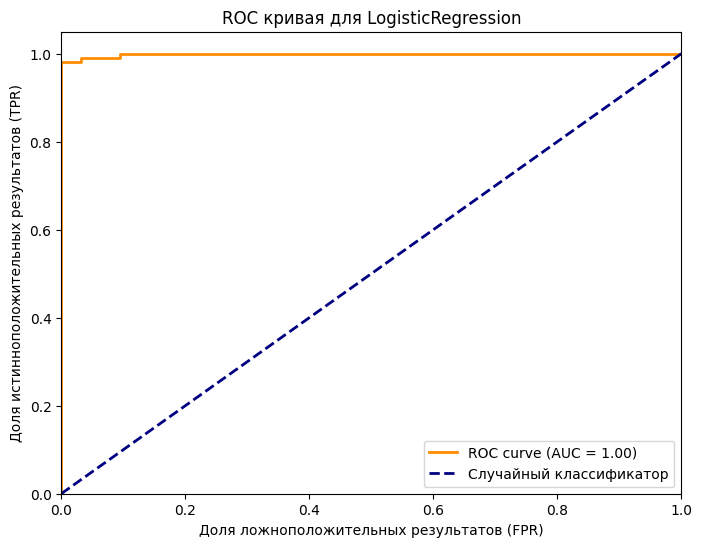

In [103]:
# Вычисление ROC кривой
fpr, tpr, thresholds = roc_curve(y_test_cls, y_pred_proba_cls)

# Вычисление площади под ROC кривой (AUC)
auc = roc_auc_score(y_test_cls, y_pred_proba_cls)

# Визуализация ROC кривой
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Случайный классификатор')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Доля ложноположительных результатов (FPR)')
plt.ylabel('Доля истинноположительных результатов (TPR)')
plt.title('ROC кривая для LogisticRegression')
plt.legend(loc="lower right")
plt.show()

#Анализ результатов:
Рассшифровка площади под кривой (AUC):

AUC = 1.0: Идеальный классификатор.

AUC = 0.5: Классификатор не лучше случайного угадывания.

Чем ближе AUC к 1, тем лучше модель классифицирует положительные и отрицательные классы.

В данном случае, классификатор делает точное предсказание.